# Stats and Analysis Notebook

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp
import sqlite3
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway

Read clean data

In [2]:
gross_budget=pd.read_csv('../Data/clean_data/gross_budget.csv',index_col=0)

In [3]:
movie_genre_profit=pd.read_csv('../Data/clean_data/gross_budget_genre.csv',index_col=0)

In [4]:
gross_budget.head()

,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901
2,Shrek Forever After,513900000,165000000,238736787,756244673,591244673,358.330105
3,The Twilight Saga: Eclipse,398000000,68000000,300531751,706102828,638102828,938.386512
4,Iron Man 2,311500000,170000000,312433331,621156389,451156389,265.386111


In [5]:
movie_genre_profit.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


Analysis and recommendation

In [6]:
# exploding genra column
#movie_genre_profit=movie_genre_profit.assign(genres=movie_genre_profit.genres.str.split(",")).explode('genres')

In [7]:
movie_genre_profit.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


In [8]:
corr=movie_genre_profit[['production_budget','net_profit' , 'domestic_gross_y','foreign_gross','worldwide_gross']].corr()

In [9]:
corr

,production_budget,net_profit,domestic_gross_y,foreign_gross,worldwide_gross
production_budget,1.000000,0.654033,0.699290,0.760902,0.777736
net_profit,0.654033,1.000000,0.935265,0.873253,0.984173
domestic_gross_y,0.699290,0.935265,1.000000,0.808757,0.940983
foreign_gross,0.760902,0.873253,0.808757,1.000000,0.903887
worldwide_gross,0.777736,0.984173,0.940983,0.903887,1.000000


In [10]:
movie_genre_profit.sort_values('foreign_gross' , ascending=False)

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
709,Avengers: Age of Ultron,946400000,330600000,459005868,1403013963,1072413963,324.384139,tt2395427,141.0,Action,7.3,665594.0,44.383,2015-05-01,May
709,Avengers: Age of Ultron,946400000,330600000,459005868,1403013963,1072413963,324.384139,tt2395427,141.0,Sci-Fi,7.3,665594.0,44.383,2015-05-01,May
709,Avengers: Age of Ultron,946400000,330600000,459005868,1403013963,1072413963,324.384139,tt2395427,141.0,Adventure,7.3,665594.0,44.383,2015-05-01,May
1095,Jurassic World: Fallen Kingdom,891800000,170000000,417719760,1305772799,1135772799,668.101646,tt4881806,128.0,Action,6.2,219125.0,34.958,2018-06-22,June
1095,Jurassic World: Fallen Kingdom,891800000,170000000,417719760,1305772799,1135772799,668.101646,tt4881806,128.0,Adventure,6.2,219125.0,34.958,2018-06-22,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,Freeheld,0,7000000,546201,1732228,-5267772,-75.253886,tt1658801,103.0,Biography,6.5,10534.0,7.313,2015-10-02,October
842,Freeheld,0,7000000,546201,1732228,-5267772,-75.253886,tt1658801,103.0,Drama,6.5,10534.0,7.313,2015-10-02,October
842,Freeheld,0,7000000,546201,1732228,-5267772,-75.253886,tt1658801,103.0,Romance,6.5,10534.0,7.313,2015-10-02,October
843,Maggie,0,4500000,187112,1027760,-3472240,-77.160889,tt1881002,95.0,Drama,5.6,38671.0,13.000,2015-05-08,May


In [11]:
genres_group_ROI=movie_genre_profit.groupby('genres')['ROI'].mean()
genres_group_ROI.sort_values(ascending=False)

genres
Horror         1266.272146
Mystery        1196.900004
Thriller        722.538868
Sport           370.518995
Documentary     339.749306
Romance         331.405708
Music           308.979671
Sci-Fi          304.973267
Animation       288.559933
Comedy          275.843857
Biography       257.000103
Drama           245.578295
Adventure       237.396481
Fantasy         231.195001
Action          197.524001
Family          181.243727
History         176.870635
Crime           142.333966
Musical         137.381944
Western          84.068855
War              57.951986
Name: ROI, dtype: float64

In [12]:
genres_group_production=movie_genre_profit.groupby('genres')['production_budget'].mean()
genres_group_production.sort_values(ascending=True)

genres
Documentary    8.160000e+06
Music          2.014118e+07
Horror         2.071752e+07
Romance        2.173003e+07
War            2.236364e+07
Mystery        2.627189e+07
Biography      2.677312e+07
Drama          2.839902e+07
Sport          3.228261e+07
Crime          3.442455e+07
History        3.718824e+07
Thriller       3.871478e+07
Comedy         4.312712e+07
Western        6.243750e+07
Family         6.741029e+07
Musical        6.966667e+07
Fantasy        8.819787e+07
Action         8.820419e+07
Sci-Fi         1.000887e+08
Animation      1.031012e+08
Adventure      1.114943e+08
Name: production_budget, dtype: float64

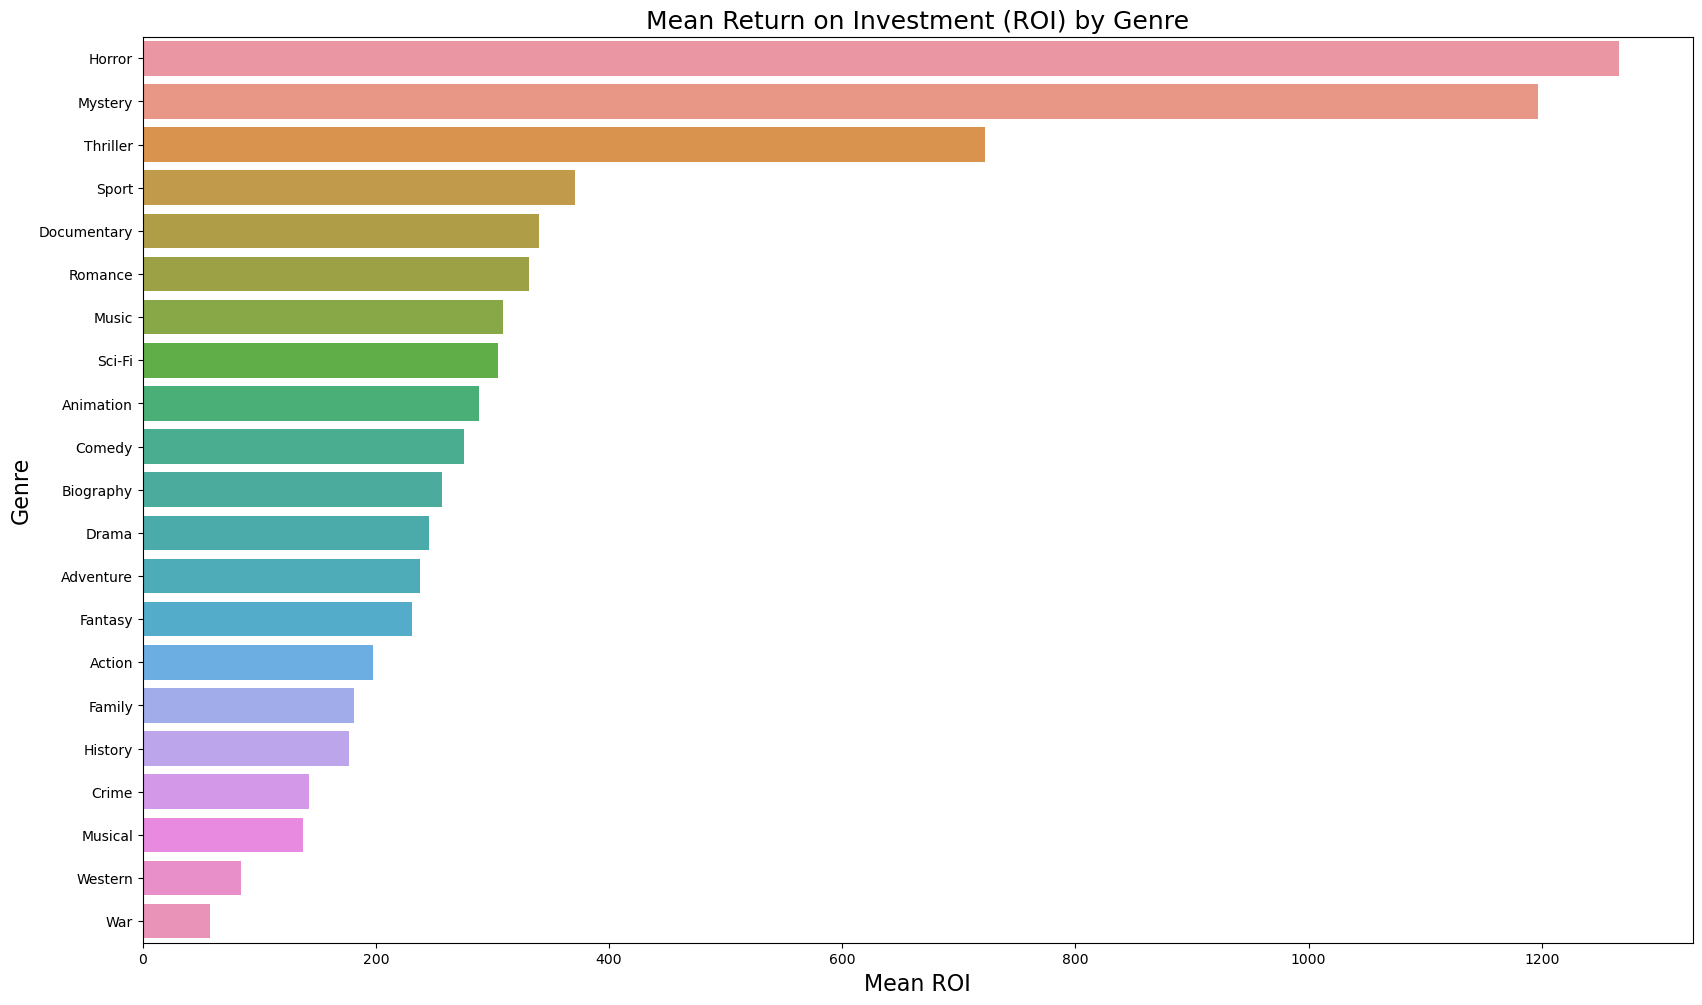

In [13]:
genres_group_ROI = genres_group_ROI.sort_values(ascending=False)
plt.figure(figsize=(20, 12),dpi=100)
sns.barplot(x=genres_group_ROI.values, y=genres_group_ROI.index)

plt.title('Mean Return on Investment (ROI) by Genre', fontsize=18)
plt.xlabel('Mean ROI', fontsize=16)
plt.ylabel('Genre', fontsize=16)

plt.savefig('../images/Mean_ROI.png')

plt.show()

In [14]:
ROI_by_genre = [movie_genre_profit[movie_genre_profit['genres'] == genre]['ROI'] for genre in movie_genre_profit['genres'].unique()]

f_stats, p_value = f_oneway(*ROI_by_genre)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ROI among genres.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean ROI among genres.")

4.677511877963311e-14
Reject the null hypothesis. There is a significant difference in mean ROI among genres.


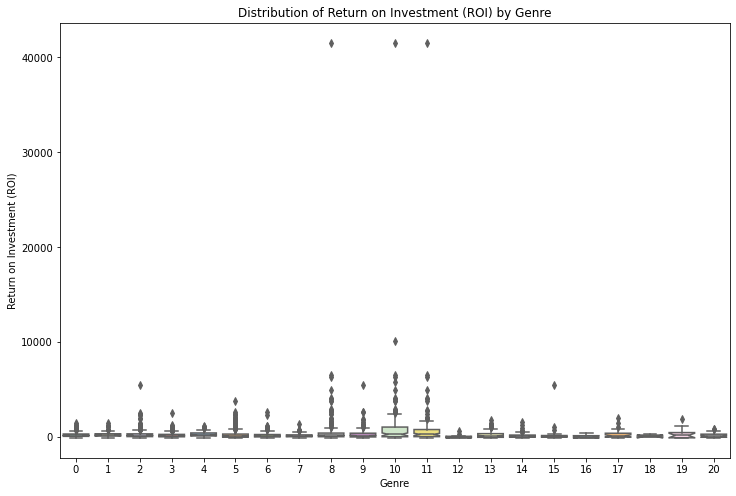

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=ROI_by_genre, notch=True, palette="Set3")
plt.title('Distribution of Return on Investment (ROI) by Genre')
plt.xlabel('Genre')
plt.ylabel('Return on Investment (ROI)')
plt.show()

net profit by the month

In [16]:
month_profit=movie_genre_profit.groupby('release_month')['net_profit'].mean()
month_profit.sort_values(ascending=False)

release_month
June         2.098934e+08
May          1.995443e+08
July         1.737395e+08
November     1.466814e+08
December     1.366816e+08
April        1.243651e+08
February     1.051084e+08
March        8.417137e+07
August       7.256416e+07
September    7.024569e+07
October      6.243714e+07
January      6.037574e+07
Name: net_profit, dtype: float64

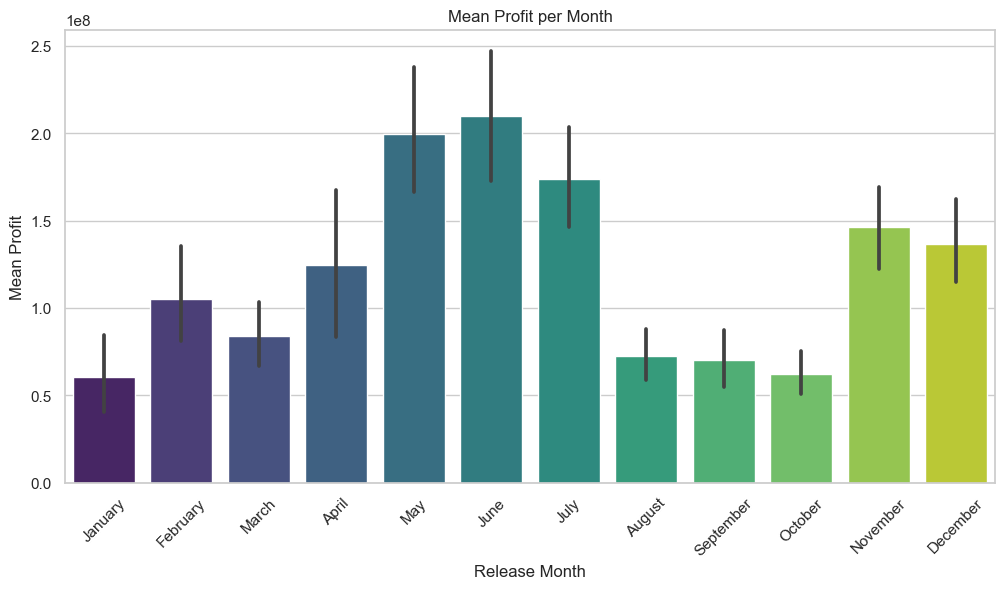

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6),dpi=100)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
sns.barplot(x=movie_genre_profit.release_month, y=movie_genre_profit.net_profit, order=month_order, palette='viridis')
plt.title('Mean Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit')
plt.show()

In [18]:
net_by_month = [movie_genre_profit[movie_genre_profit['release_month'] == month]['net_profit'] for month in movie_genre_profit['release_month'].unique()]

f_stats, p_value = f_oneway(*net_by_month)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean net profit among genres.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean net profit among genres.")

7.240216945472942e-31
Reject the null hypothesis. There is a significant difference in mean net profit among genres.


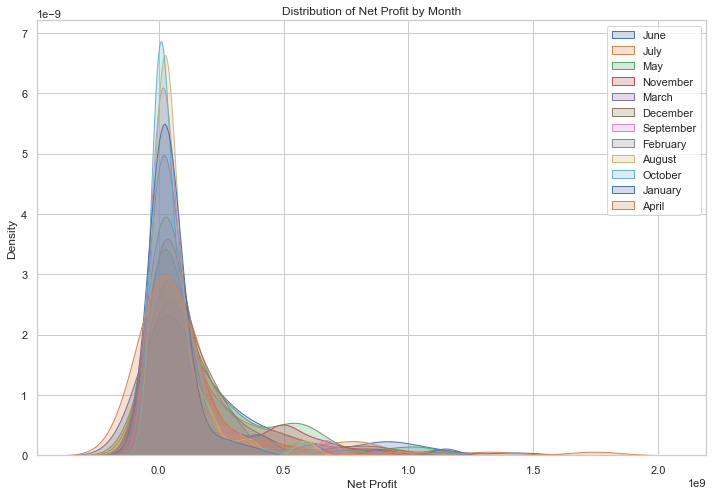

In [19]:
plt.figure(figsize=(12, 8))
for month, net_values in zip(movie_genre_profit['release_month'].unique(), net_by_month):
    sns.kdeplot(net_values, label=month, fill=True, common_norm=False)

plt.title('Distribution of Net Profit by Month')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

Mean Absolute Error: 46528988.824084066
Mean Squared Error: 6049061296552347.0
Root Mean Squared Error: 77775711.48213527


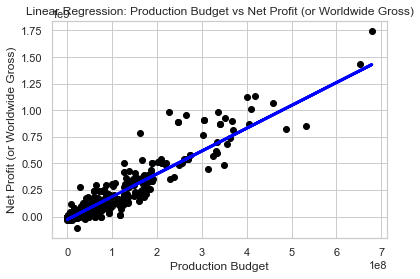

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided columns
# Select the features and target variable
features = movie_genre_profit[['domestic_gross_y']]
target = movie_genre_profit['net_profit']  # or df['worldwide_gross']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Visualize the results (optional)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Production Budget')
plt.ylabel('Net Profit (or Worldwide Gross)')
plt.title('Linear Regression: Production Budget vs Net Profit (or Worldwide Gross)')
plt.show()


Mean Absolute Error: 96442379.54615241
Mean Squared Error: 2.825364465545331e+16
Root Mean Squared Error: 168088204.98611233


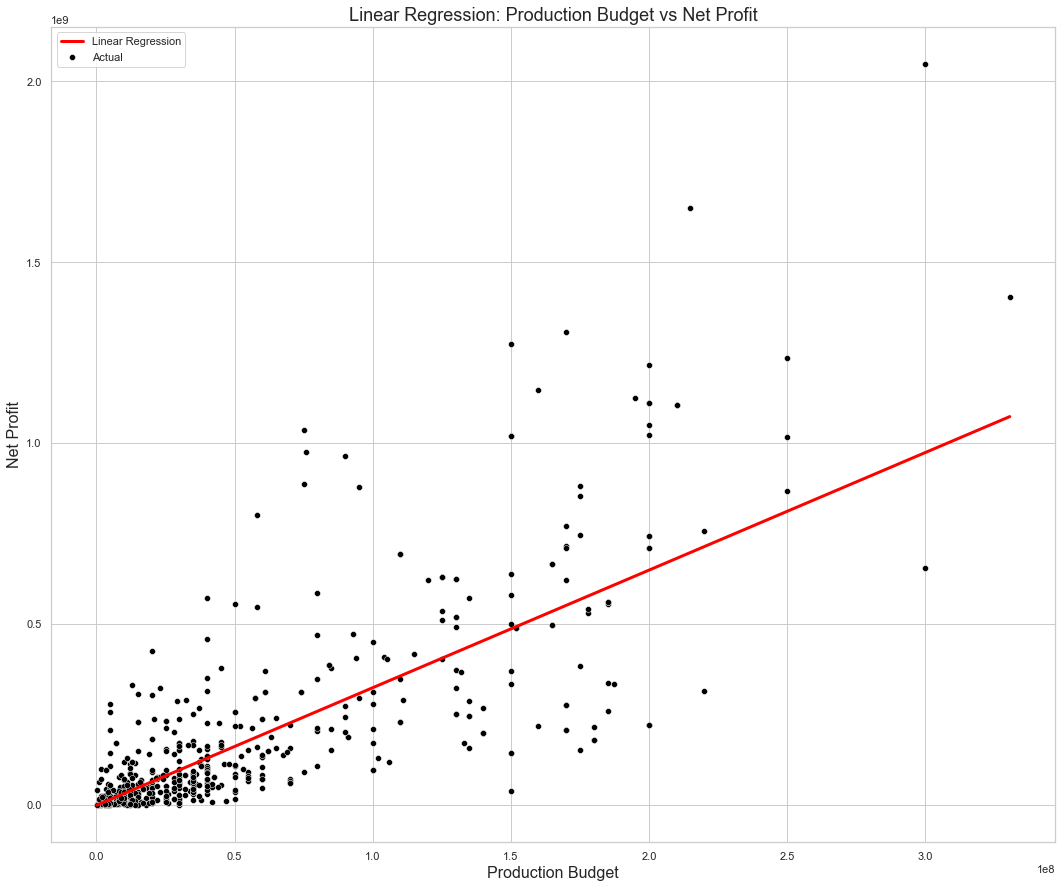

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided columns
# Select the features and target variable
features = movie_genre_profit[['production_budget']]
target = movie_genre_profit['worldwide_gross']  # or df['worldwide_gross']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Visualize the results using Seaborn
plt.figure(figsize=(18, 15))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='black', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', linewidth=3, label='Linear Regression')
plt.xlabel('Production Budget',fontsize=16)
plt.ylabel('Net Profit', fontsize=16)
plt.title('Linear Regression: Production Budget vs Net Profit',fontsize=18)
#plt.legend()

plt.savefig('../images/Linear_Regression.png')

plt.show()
